# BLIŽINA, EKSCENTRIČNOST IN VMESNA CENTRALNOST

Pri najinem projektu bova s pomočjo treh različnih mer (ekscentričnosti, bližine in vmesne centralnosti) iskala in analizirala najpomembnejša vozlišča v grafih oziroma socialnih omrežjih. Vozlišče je pomembnejše, če ima višjo vrednost bližine in vmesne centralnosti ter nižjo vrednost ekscentričnosti. Natančnejši opisi pojmov so spodaj. Primerjala bova, kako pogosto je vozlišče, ki je pomembno z vidika ene mere, pomembno tudi v okviru ostalih dveh mer.

Najino glavno orodje za analizo grafov bo $Sage$, kjer bova generirala več grafov (približno 1000) v različnih velikostih (približno 10), grafe socialnih omrežij pa bova pridobila s spleta. Opazovala bova tudi, kako se vrednosti mer za najpomembnejša vozlišča spremenijo, če se omejimo na podgraf v določenem grafu. Grafi, ki jih bova pri projektu analizirala, bodo neusmerjeni.

## Bližina
Bližina je v povezanem grafu mera centralnosti, ki jo izračunamo kot
recipročno vsoto dolžin najkrajših poti med nekim vozliščem in vsemi
drugimi vozlišči v grafu. Bližje kot je opazovano vozlišče ostalim
vozliščem v grafu, bolj centralno je.

\begin{equation*}
C(x) = \frac{1}{\sum_{y}d(y,x)},
\end{equation*}

kjer je *d*(*y*, *x*) razdalja med vozliščema x in y. Pogosto se namesto
zgornje vrednosti izračuna povprečno dolžino najkrajše poti v grafu.
Dobimo jo tako, da zgornjo formulo pomnožimo z *N* − 1, kjer je *N*
število vseh vozlišč v grafu. Pri obsežnejših grafih se  − 1 izpusti iz
enačbe, zato se za bližino uporablja kar sledečo formulo:

\begin{equation*}
C(x) = \frac{N}{\sum_{y}d(y,x)}.
\end{equation*}

Pri usmerjenih grafih je potrebno upoštevati tudi smer povezav. Določeno
vozlišče ima lahko različno bližino za vhodne in izhodne povezave. V
nepovezanih grafih namesto recipročne vsote dolžin najkrajših poti med
vozlišči računamo vsoto recipročnih dolžin najkrajših poti med vozlišči.
Pri tem upoštevamo, da $1/\infty = 0$

\begin{equation*}
H(x) = \frac{N}{\sum_{y \neq x}d(y,x)}.
\end{equation*}

## Ekscentričnost (izsrednost)
Ekscentričnost nekega vozlišča $v$  v povezanem grafu $G$ označimo z $\epsilon(v)$ in je definirana kot maksimalna dolžina med vozliščem $v$ in katerimkoli drugim vozliščem v grafu $G$. V nepovezanih grafih imajo vsa vozlišča neskončno vrednost ekscentičnosti.
Maksimalno ekscentričnost v grafu imenujemo diameter (premer) grafa (najdaljša najkrajša pot med dvema vozliščema grafa), minimalno ekscentričnost pa polmer grafa.

## Vmesna centralnost

V teoriji grafov je vmesna centralnost mera centralizacije grafa, ki temelji na najkrajših poteh v grafu. Za vsak par vozlišč v povezanem grafu, obstaja vsaj ena najkrajša pot med vozliščema tako, da je katerokoli število povezav, po katerih gre ta pot (za neutežene grafe) ali pa vsota uteži na povezavah (za utežene grafe) minimalna. Vmesna centralnost za vsako vozlišče je število teh najkrajših poti, ki grejo skozi vozlišče. Vmesna centralnost se uporablja v mnogih problemih v teoriji omrežij, tudi v problemih povezanih s socialnimi omrežji, biologijo in transportom. V telekomunikacijskem omrežju ima vozlišče z višjo vrednostjo vmesne centralnosti večjo kontrolo nad omrežjem, ker bo več informacij teklo čez to vozlišče. Vmesna centralnost vozlišča $v$ je podana z izrazom:

\begin{equation*}
g(v) = \sum_{s \ne v \ne t}^{ } \frac{\sigma_{st} (v)}{\sigma_{st}}
\end{equation*}

Kjer je $\sigma_{st}$ skupno število najkrajših poti od vozlišča $s$ do vozlišča $t$ in $\sigma_{st} (v)$ je število teh poti, ki grejo skozi $v$. 

## Implementacija algoritma
Najprej se bova osredotočila na implementacijo algoritma. Kot prvo sva definirala bližino, ekscentričnost in vmesno centralnost, nato pa sva za sam algoritem potrebovala še dve funkciji, in sicer *najboljsa_vozlisca* in *skupna*. Prva nam pomaga iz seznama vozlišč in mer, ki jih dobimo na začetku v funkcijah *blizina*, *ekscentricnost* in *vmesna_centralnost*, izločiti tista vozlišča, ki nam predstavljajo najboljših 10% vozlišč. Pri bližini in vmesni centralnosti so to vozlišča, ki imajo najvišjo vrednost, pri ekscentričnosti pa vozlišča z najmanjšo vrednostjo. V drugi funkciji pa preverimo, katera vozliščča so skupna v vseh treh seznamih najboljših vozlišč. Na ta način dobimo množico tistih vozlišč, ki se pojavijo v vseh treh merah kot najboljša. V funkciji *algoritem*, ki je odvisna od podane velikosti za graf, pa nato za 100 grafov iste velikosti poračunamo kolikšen procent vozlišč se ujema pri vseh treh mera. Sproti računamo še povprečje tega procenta za vseh 100 grafov, kar bova v prvem delu tudi poskusila analizirati. 

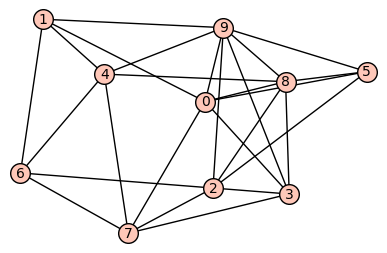

In [1]:
G = graphs.RandomGNP(10, 0.5)
show(G)

In [2]:
def blizina(G):
    seznam = []
    for x in range(len(G.distance_all_pairs())):
        D = 1/sum(G.distance_all_pairs()[x].values())
        seznam.append((x,D))
    return seznam
blizina(G)

[(0, 1/12),
 (1, 1/14),
 (2, 1/12),
 (3, 1/13),
 (4, 1/13),
 (5, 1/14),
 (6, 1/14),
 (7, 1/13),
 (8, 1/12),
 (9, 1/11)]

In [3]:
def ekscentricnost(G):
    seznam = []
    for x in range(len(G.distance_all_pairs())):
        E = G.eccentricity(x)
        seznam.append((x,E))
    return seznam
ekscentricnost(G)

[(0, 2),
 (1, 2),
 (2, 2),
 (3, 2),
 (4, 2),
 (5, 2),
 (6, 2),
 (7, 2),
 (8, 2),
 (9, 2)]

In [4]:
import networkx as nx 

def vmesna_centralnost(G):
    for x in range(len(G.distance_all_pairs())):
        nxG = G.networkx_graph()
        Vslovar = nx.betweenness_centrality(nxG) #to nam vrne slovar, kjer je vozlišče ključ in vmesna centralnost vozlišča vrednost
        V = Vslovar.items() #slovar moramo pretvoriti v seznam, da bo prave oblike za algoritem
        return V
vmesna_centralnost(G)

[(0, 0.0810185185185185),
 (1, 0.030092592592592587),
 (2, 0.09953703703703703),
 (3, 0.01944444444444444),
 (4, 0.05555555555555554),
 (5, 0.005555555555555556),
 (6, 0.030092592592592587),
 (7, 0.05648148148148147),
 (8, 0.04953703703703703),
 (9, 0.10046296296296295)]

In [173]:
import math

def najboljsa_vozlisca(G, velikost, B, E, V):

    najboljsi = round(velikost * 0.1) #zračunamo, koliko najboljših vozlišč bomo vzeli ven, če želimo 10% najboljših
            
    maxB = [] #za bližino želimo dobiti seznam najboljših vozlišč, torej tisth, kjer je bližina največja
    for j in range(najboljsi):
        najboljsiB = 0
        for element in B:
            if najboljsiB < element[1]:
                najboljsiB = max(najboljsiB, element[1]) #poiščemo vozlišče z največjo bližino
                vozlisceB = element[0] #zapomnimo si še vozlišče
        B.remove(element) #ta element odtsranimo iz seznama B
        maxB.append((vozlisceB, najboljsiB))#element dodamo v nov seznam najboljših
    minimalni = 10000000 #Preveriti moramo še, če je slučajno v B ostal kakšen element, ki ima enako vrednost, kot jo ima najmanjši element v maxB, saj mora biti potem to vozlišče tudi v maxB
    for element in maxB:
        if element[1] < minimalni:
            minimalni = element[1]
    for element in B:
        if element[1] == minimalni:
            maxB.append((element[0], element[1]))

    minE = [] #za ekscentričnost želimo dobiti tista vozlišča, kjer je ekscentričnost najmanjša
    for j in range(najboljsi):
        najboljsiE = 10000000000000 #neka velika številka, ker želimo najti minimum
        for elementE in E:
            if najboljsiE > elementE[1]:
                najboljsiE = min(elementE[1], najboljsiE)
                vozlisceE = elementE[0]
        E.remove(elementE)
        minE.append((vozlisceE, najboljsiE))
    maksimalni = 0 #Preveriti moramo še, če je slučajno v E ostal kakšen element, ki ima enako vrednost, kot jo ima največji element v minE, saj mora biti potem to vozlišče tudi v minE
    for element in minE:
        if element[1] > minimalni:
            maksimalni = element[1]
    for element in E:
        if element[1] == maksimalni:
            minE.append((element[0], element[1]))


    maxV = [] #za vmesno centralnost ponovno gledamo največjo vrednost
    for j in range(najboljsi):
        najboljsiV = 0
        for elementV in V:
            if najboljsiV < elementV[1]:
                najboljsiV = max(najboljsiV, elementV[1])
                vozlisceV = elementV[0]
        V.remove(elementV)
        maxV.append((vozlisceV, najboljsiV))
    minimalni = 10000000 #Preveriti moramo še, če je slučajno v V ostal kakšen element, ki ima enako vrednost, kot jo ima najmanjši element v maxV, saj mora biti potem to vozlišče tudi v maxV
    for element in maxV:
        if element[1] < minimalni:
            minimalni = element[1]
    for element in V:
        if element[1] == minimalni:
            maxV.append((element[0], element[1]))

    return(maxB, minE, maxV)

In [174]:
def skupna(maxB, minE, maxV):
    imenaB = [] #Shranimo samo imena najpomembnejših vozlišč iz vidika bližine v nov seznam
    for element in maxB:
        imenaB+= [element[0]]
        
    imenaE = [] #Shranimo samo imena najpomembnejših vozlišč iz vidika ekscentričnosti v nov seznam
    for element in minE:
        imenaE+= [element[0]]

    imenaV = [] #Shranimo samo imena najpomembnejših vozlišč iz vidika vmesne centralnosti v nov seznam
    for element in maxV:
        imenaV+= [element[0]]

    skupna_vozl = set(imenaB).intersection(imenaE).intersection(imenaV) #naredimo presek vsek treh seznamov.
    #Še po parih, če nam bo slučajno pršlo prou ...
    #najp_B_E = set(imenaB).intersection(imenaE)
    #najp_B_V = set(imenaB).intersection(imenaV)
    #najp_E_V = set(imenaE).intersection(imenaV)
    return(skupna_vozl)

In [170]:
from __future__ import division

def algoritem(velikost):
    povprecje = 0
    for i in range(10):
        G = graphs.RandomGNP(velikost, 0.7) #generiramo graf
        if G.is_connected() == True: #preverimo, če je povezan
            B = blizina(G) #dobimo seznam vozlišč in njihove bližine
            E = ekscentricnost(G) #dobimo seznam vozlišč in njihove ekscentričnosti
            V = vmesna_centralnost(G) #dobimo seznam vozlišč in njihove vmesne centralnosti
            
            maxB, minE, maxV = najboljsa_vozlisca(G, velikost, B, E, V) #naredimo sezname najboljših vozlišč za vsako mero posebej
            skupna_vozlisca = skupna(maxB, minE, maxV) #preverimo, koliko vozlišč je vsem trem meram skupno
            stevilo_skupnih_vozlisc = len(skupna_vozlisca) #preštejemo števila skupnih vozlišč
            pokritost = float(stevilo_skupnih_vozlisc / max(len(maxB), len(minE), len(maxV))) #zračunamo procent, koliko vozlišč je skupnih vsem trem meram
            povprecje = (povprecje + pokritost) / 2 #sproti računamo povprečno pokritost za vse grafe
        
    return(povprecje)
            
        
        
    
algoritem(10)   

0.05146484375

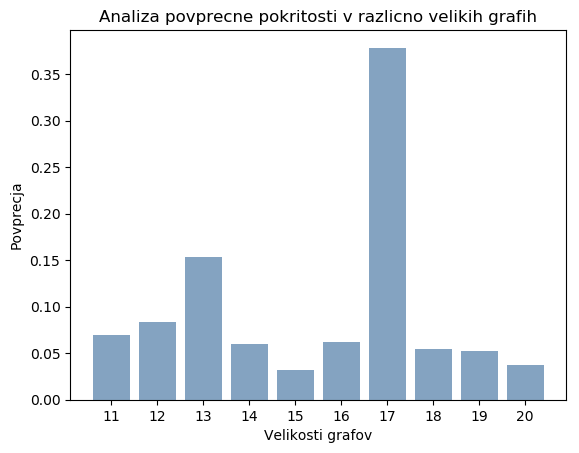

In [175]:
import matplotlib.pyplot as plt
plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

velikosti = (20, 40, 75, 100, 200, 400, 800, 1000, 2000) #izberemo si velikosti grafov, na katerih bomo delali analizo
seznam_velikosti = list(velikosti)
povprecja = ()
for i in range(10):
    povprecja +=(algoritem(seznam_velikosti[i]),) #za vsako velikost poženemo algoritem, da dobimo povprečno pokritost

y_pos = np.arange(len(povprecja))
plt.bar(y_pos,povprecja,align = 'center',color=(0.2, 0.4, 0.6, 0.6))
plt.xticks(y_pos,velikosti)
plt.xlabel('Velikosti grafov')
plt.ylabel('Povprecja')
plt.title('Analiza povprecne pokritosti v razlicno velikih grafih')
plt.show()

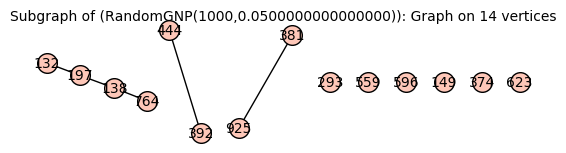

In [27]:
G.random_subgraph(0.01)